# Assignment 2 - Machine Learning Basics

## *Vuk Lesi*
Netid:  *vl46*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(a) The number of samples is an important factor, regardless of the method used. However, constructing a model can be very hard if the small number of predictors that are available do not intrinsically have significant influence on the responses. A more flexible method may be a better choice in this case due to the number of available samples.

(b) If the number of observations is small, it becomes extremely easy to overfit the data with a more flexible method. This may especially be a problem if there is a large number of predictos, many of which may actually have very limited influence on the output values. Thus, in this case, a less flexible method may be a better first approach.

(c) More flexible methods excel in describing non-linear relations - thus, in this case, a flexible approach would be favored.

(d) In this case a trade-off analysis should be performed. Given that the variance of the error term is extremely high, a very flexible model could easily pick-up noise in the training data. On the other hand, less flexible method may fail to model intrinsic relationships within the data.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) Regression, inference, $n=500$, $p=3$

(b) Classification, prediction, $n=20$, $p=14$

(c) Regression, prediction, $n=52$, $p=3$

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**(a)**

In [2]:
import numpy as np

# (a) Write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        ;
    def fit(self, xTrain, yTrain): # Save the training data to properties of this class
        self.x = xTrain
        self.y = yTrain
        
    def predict(self, xTest, k):
        y_hat = [] # Variable to store the estimated class label for
        self.distanceMatrix = np.zeros((np.shape(xTest)[0],np.shape(self.x)[0])) # Initialize distance matrix
        
        # Calculate the distance from each vector in x to the training data                
        for x1Idx, currentX1 in enumerate(xTest[:,]):
            for x2Idx, currentX2 in enumerate(self.x):
                self.distanceMatrix[x1Idx, x2Idx] = np.linalg.norm(currentX2-currentX1) # Compute the distance to every training point
                
        # Get K nearest neighbors for every point
        indices = myKnn.distanceMatrix.argsort(axis=0)[:k] # Get indices

        # Count yTrain and compute y_hat
        yHat = self.y[indices].sum(axis = 0) > (k/2)
        
        # Return the estimated targets
        return yHat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)-(c)**

In [3]:
import time

# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

# Load all data
xTrainLow = np.genfromtxt('datasets/A1_X_train_low.csv', delimiter=',')
yTrainLow = np.genfromtxt('datasets/A1_Y_train_low.csv', delimiter=',')

xTrainHigh = np.genfromtxt('datasets/A1_X_train_high.csv', delimiter=',')
yTrainHigh = np.genfromtxt('datasets/A1_Y_train_high.csv', delimiter=',')

xTestLow = np.genfromtxt('datasets/A1_X_test_low.csv', delimiter=',')
yTestLow = np.genfromtxt('datasets/A1_Y_test_low.csv', delimiter=',')

xTestHigh = np.genfromtxt('datasets/A1_X_test_high.csv', delimiter=',')
yTestHigh = np.genfromtxt('datasets/A1_Y_test_high.csv', delimiter=',')


# Create KNN object
myKnn = Knn()

t0 = time.time() # Get time before computation
# Fit low dimensional train set
myKnn.fit(xTrainLow,yTrainLow)
# Test on low dimensional test set
yHatLow = myKnn.predict(xTestLow,5)
# Compute accuracy
accuracyLow = accuracy(yTestLow,yHatLow)
t1 = time.time() # Get time after computation

t2 = time.time() # Get time before computation
# Fit high dimensional train set
myKnn.fit(xTrainHigh,yTrainHigh)
# Test on low dimensional test set
yHatHigh = myKnn.predict(xTestHigh,5)
# Compute accuracy
accuracyHigh = accuracy(yTestHigh,yHatHigh)
t3 = time.time() # Get time after computation


print("Accuracy: {}, Time [sec]: {}  (low-dimensional)".format(accuracyLow,t1-t0))
print("Accuracy: {}, Time [sec]: {} (high-dimensional)".format(accuracyHigh,t3-t2))


Accuracy: 0.917, Time [sec]: 5.308447599411011  (low-dimensional)
Accuracy: 0.99, Time [sec]: 5.154385805130005 (high-dimensional)


**(d)**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# scikit KNN

sKnn = KNeighborsClassifier() # Default K is 5

t0 = time.time() # Get time before computation
# Fit low dimensional train set
sKnn.fit(xTrainLow,yTrainLow)
# Test on low dimensional test set
yHatLow = sKnn.predict(xTestLow)
# Compute accuracy
accuracyLow = accuracy(yTestLow,yHatLow)
t1 = time.time() # Get time after computation

t2 = time.time() # Get time before computation
# Fit high dimensional train set
sKnn.fit(xTrainHigh,yTrainHigh)
# Test on low dimensional test set
yHatHigh = sKnn.predict(xTestHigh)
# Compute accuracy
accuracyHigh = accuracy(yTestHigh,yHatHigh)
t3 = time.time() # Get time after computation


print("Accuracy: {}, Time [sec]: {}  (low-dimensional)".format(accuracyLow,t1-t0))
print("Accuracy: {}, Time [sec]: {} (high-dimensional)".format(accuracyHigh,t3-t2))


Accuracy: 0.925, Time [sec]: 0.01000070571899414  (low-dimensional)
Accuracy: 0.993, Time [sec]: 0.20011162757873535 (high-dimensional)


Accuracy is marginally better in case of scikit KNN classifier, while execution time is lower. The accuracy difference most likely originates from the implemenation detail described in a warning in the scikit documentation for the KNN classifier: *"Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data."* The execution times are higher in my case since my KNN class is not entirely vectorized (although most of it is).

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [5]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**(a)** *Table 1(a). Distance from test point $X_0(0,0,0)$ for all observations (code given below)*

| Observation | $X_1$ | $X_2$ | $X_3$ | $X_4$ | $X_5$ | $X_6$ |
|------|-------|-------|-------|-------|-------|-------|
| distance to $(0,0,0)$|3.0|2.0|3.16227766| 2.23606798|1.41421356|1.73205081|

In [6]:
xTest = np.zeros((1,X.shape[1]))

distanceVector = np.zeros((X.shape[0],1))

for xIdx, currentX in enumerate(X):
    distanceVector[xIdx] = np.linalg.norm(currentX-xTest)
    
print(distanceVector)

[[ 3.        ]
 [ 2.        ]
 [ 3.16227766]
 [ 2.23606798]
 [ 1.41421356]
 [ 1.73205081]]


**(b)**
For $K=1$ only the nearest neighbor is considered. In this case it is $X_5$, and thus $X_0$ will be classified as *Red*.

**(c)**
For $K=3$, $X_2$, $X_5$ and $X_6$ are taken into account. In this case, $X_0$ will be classified as *Red*, since among $X_2$, $X_5$ and $X_6$, two are labeled *Red* and one is labeled *Blue*.

**(d)**
Generally, highly nonlinear Bayes boundary suggests a need for a more flexible model. Thus, smaller $K$ values would be preferred.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [7]:
from sklearn.datasets import make_moons

N = 1000 # Define number of samples
[myData, myLabels] = make_moons(N, True, 0.35, None) # Number of samples, shuffling, noise, random seed

**(b)**

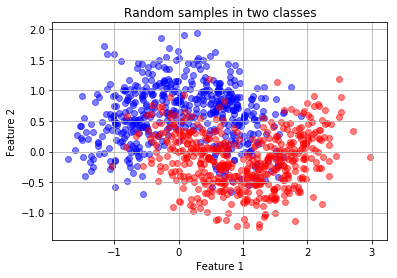

In [8]:
import matplotlib.pyplot as plt

plt.scatter(myData[myLabels==0,0],myData[myLabels==0,1], color='blue', alpha=.5)
plt.scatter(myData[myLabels==1,0],myData[myLabels==1,1], color='red', alpha=.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random samples in two classes")
plt.grid(True)

plt.show()

**(c)**

In [9]:
# Generate arrays of random indices that can be used to extract samples from original data
idxArray1 = np.random.randint(N, size=100)
idxArray2 = np.random.randint(N, size=100)
idxArray3 = np.random.randint(N, size=100)

# Form three datasets
x1 = myData[idxArray1]
y1 = myLabels[idxArray1]
x2 = myData[idxArray2]
y2 = myLabels[idxArray2]
x3 = myData[idxArray3]
y3 = myLabels[idxArray3]

### Three classifiers for data set 1
knn1_1 = KNeighborsClassifier(1) # Default K is 5
knn1_1.fit(x1,y1) # Fit training data
knn1_25 = KNeighborsClassifier(25) # Default K is 5
knn1_25.fit(x1,y1) # Fit training data
knn1_50 = KNeighborsClassifier(50) # Default K is 5
knn1_50.fit(x1,y1) # Fit training data

### Three classifiers for data set 2
knn2_1 = KNeighborsClassifier(1) # Default K is 5
knn2_1.fit(x2,y2) # Fit training data
knn2_25 = KNeighborsClassifier(25) # Default K is 5
knn2_25.fit(x2,y2) # Fit training data
knn2_50 = KNeighborsClassifier(50) # Default K is 5
knn2_50.fit(x2,y2) # Fit training data

### Three classifiers for data set 3
knn3_1 = KNeighborsClassifier(1) # Default K is 5
knn3_1.fit(x3,y3) # Fit training data
knn3_25 = KNeighborsClassifier(25) # Default K is 5
knn3_25.fit(x3,y3) # Fit training data
knn3_50 = KNeighborsClassifier(50) # Default K is 5
knn3_50.fit(x3,y3) # Fit training data



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

**(d)**

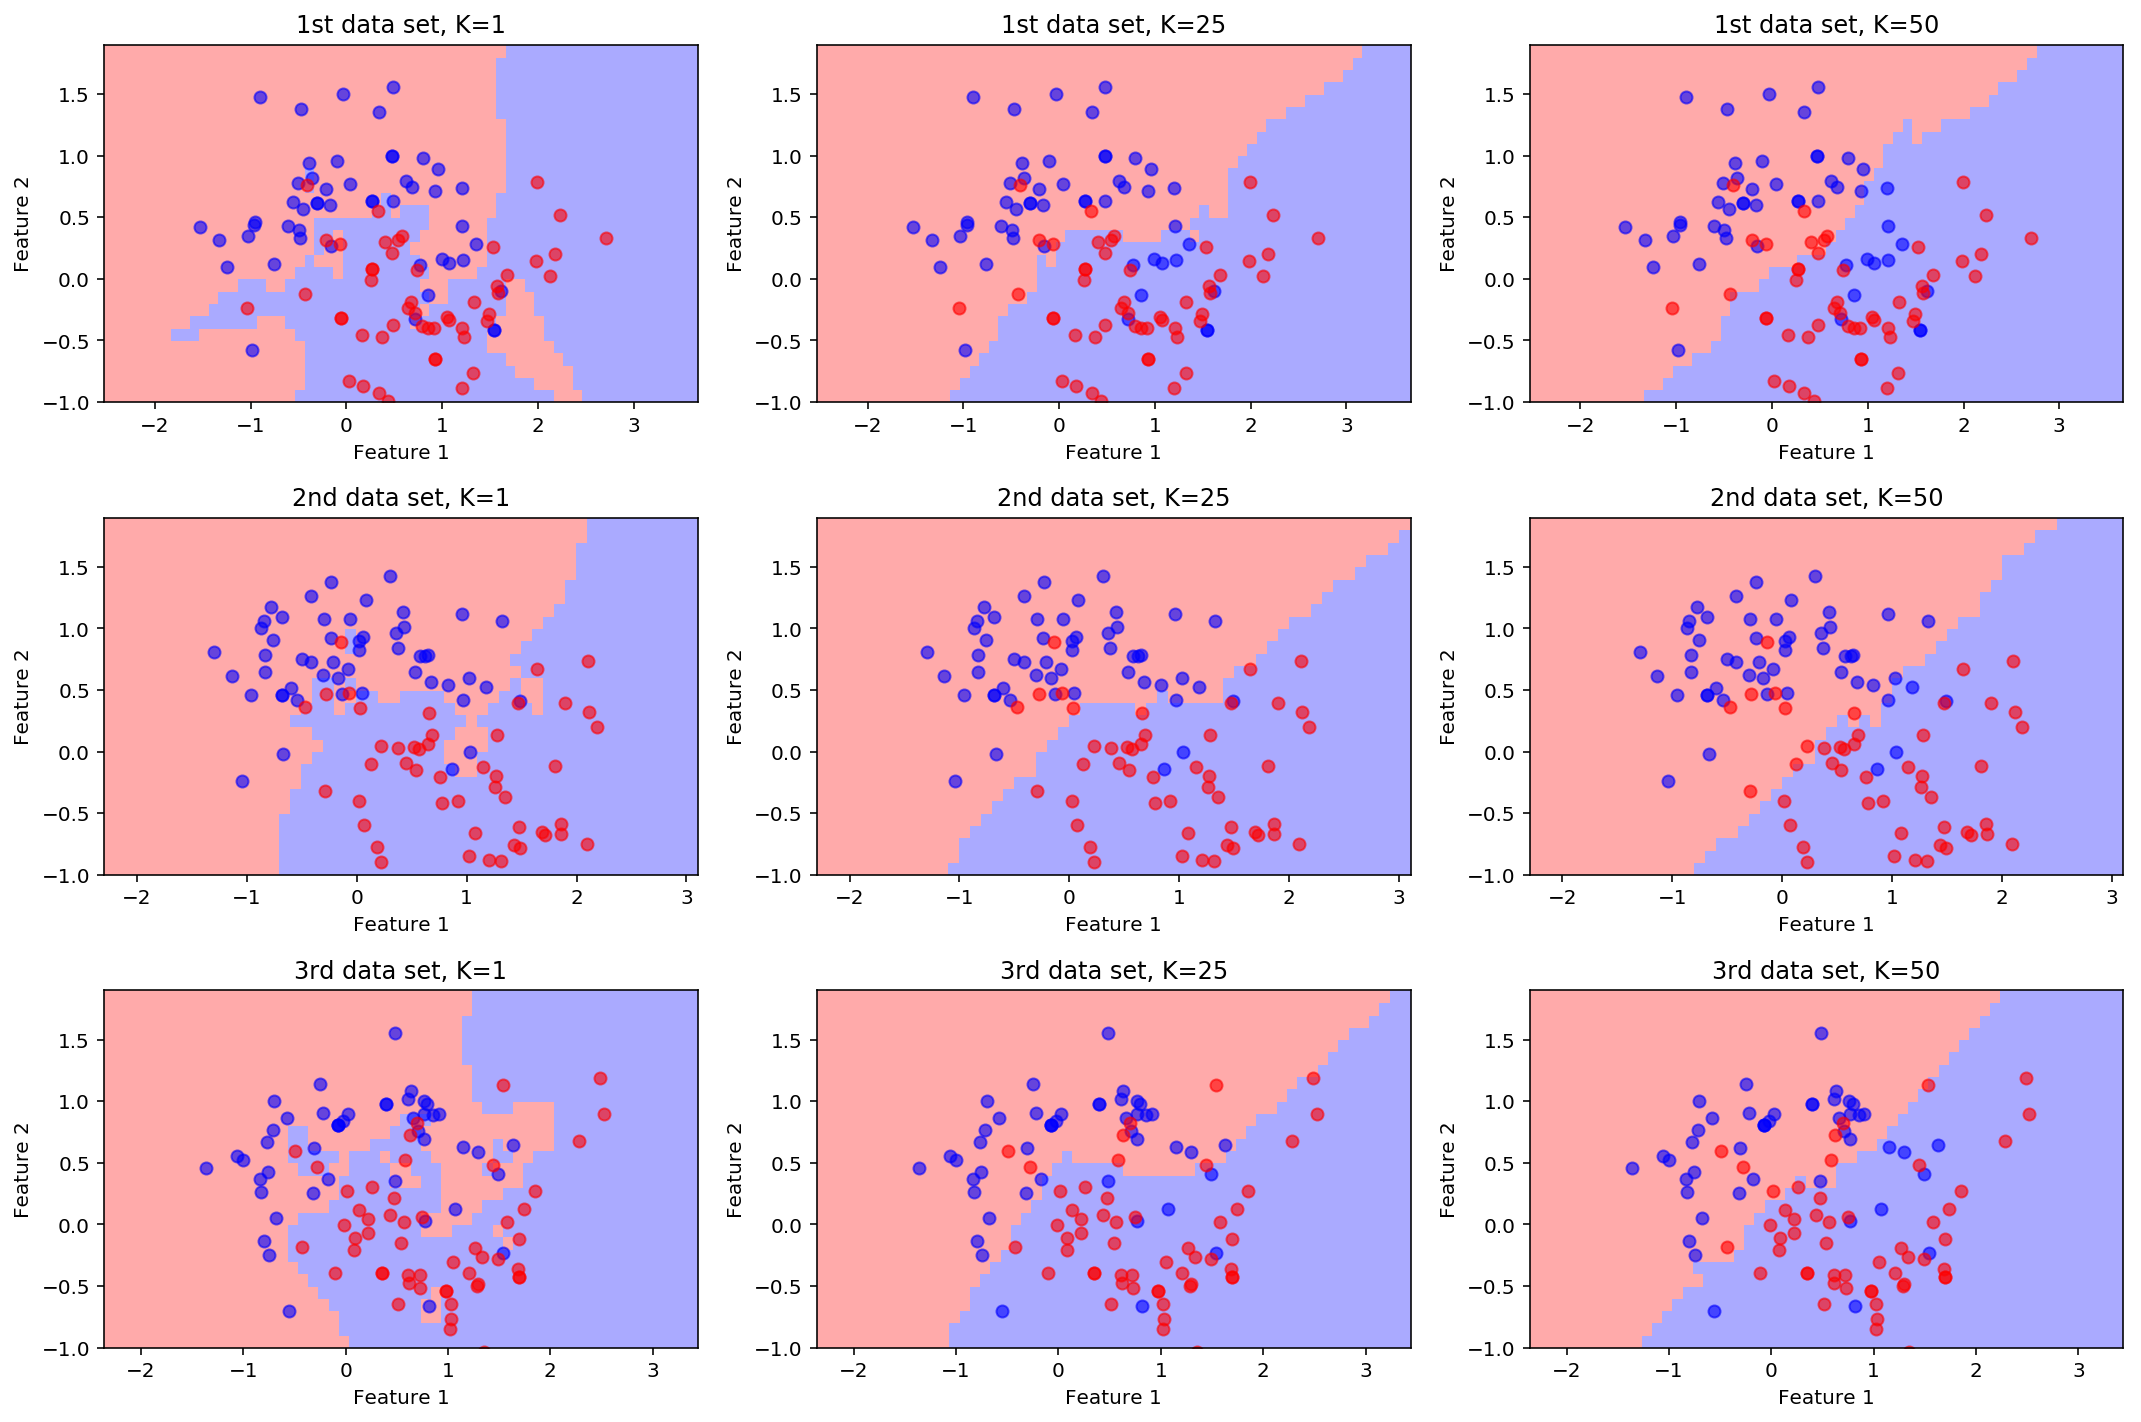

In [10]:
%config InlineBackend.figure_format = 'retina'

# Create color maps
from matplotlib.colors import ListedColormap
meshCmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(15,10))
### FIRST DATA SET
# Use mesh [x_min, x_max] x [y_min, y_max].
xMin, xMax = x1[:,0].min()-1, x1[:,0].max()+1
yMin, yMax = y1.min()-1, y1.max()+1
meshStep = 0.1 # Define mesh step
xx, yy = np.meshgrid(np.arange(xMin, xMax, meshStep), np.arange(yMin, yMax, meshStep)) # Form mesh grid

plt.subplot(3,3,1)
# Compute the decision boundary
decBound = knn1_1.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x1[y1==0,0],x1[y1==0,1], color='blue', alpha=.6)
plt.scatter(x1[y1==1,0],x1[y1==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("1st data set, K=1")

plt.subplot(3,3,2)
# Compute the decision boundary
decBound = knn1_25.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x1[y1==0,0],x1[y1==0,1], color='blue', alpha=.6)
plt.scatter(x1[y1==1,0],x1[y1==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("1st data set, K=25")

plt.subplot(3,3,3)
# Compute the decision boundary
decBound = knn1_50.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x1[y1==0,0],x1[y1==0,1], color='blue', alpha=.6)
plt.scatter(x1[y1==1,0],x1[y1==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("1st data set, K=50")

### SECOND DATA SET
# Use mesh [x_min, x_max] x [y_min, y_max].
xMin, xMax = x2[:,0].min()-1, x2[:,0].max()+1
yMin, yMax = y2.min()-1, y2.max()+1
meshStep = 0.1 # Define mesh step
xx, yy = np.meshgrid(np.arange(xMin, xMax, meshStep), np.arange(yMin, yMax, meshStep)) # Form mesh grid

plt.subplot(3,3,4)
# Compute the decision boundary
decBound = knn2_1.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x2[y2==0,0],x2[y2==0,1], color='blue', alpha=.6)
plt.scatter(x2[y2==1,0],x2[y2==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2nd data set, K=1")

plt.subplot(3,3,5)
# Compute the decision boundary
decBound = knn2_25.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x2[y2==0,0],x2[y2==0,1], color='blue', alpha=.6)
plt.scatter(x2[y2==1,0],x2[y2==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2nd data set, K=25")

plt.subplot(3,3,6)
# Compute the decision boundary
decBound = knn2_50.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x2[y2==0,0],x2[y2==0,1], color='blue', alpha=.6)
plt.scatter(x2[y2==1,0],x2[y2==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2nd data set, K=50")

### THIRD DATA SET
# Use mesh [x_min, x_max] x [y_min, y_max].
xMin, xMax = x3[:,0].min()-1, x3[:,0].max()+1
yMin, yMax = y3.min()-1, y3.max()+1
meshStep = 0.1 # Define mesh step
xx, yy = np.meshgrid(np.arange(xMin, xMax, meshStep), np.arange(yMin, yMax, meshStep)) # Form mesh grid

plt.subplot(3,3,7)
# Compute the decision boundary
decBound = knn3_1.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x3[y3==0,0],x3[y3==0,1], color='blue', alpha=.6)
plt.scatter(x3[y3==1,0],x3[y3==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("3rd data set, K=1")

plt.subplot(3,3,8)
# Compute the decision boundary
decBound = knn3_25.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x3[y3==0,0],x3[y3==0,1], color='blue', alpha=.6)
plt.scatter(x3[y3==1,0],x3[y3==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("3rd data set, K=25")

plt.subplot(3,3,9)
# Compute the decision boundary
decBound = knn3_50.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
# Form color plot
decBound = decBound.reshape(xx.shape)
plt.pcolormesh(xx, yy, decBound, cmap=meshCmap)
# Plot data
plt.scatter(x3[y3==0,0],x3[y3==0,1], color='blue', alpha=.6)
plt.scatter(x3[y3==1,0],x3[y3==1,1], color='red', alpha=.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("3rd data set, K=50")

plt.tight_layout()
plt.show()

**(e)** Overfitting is obvious when an overly flexible approach is applied ($K=1$). The data seems to be best classified for $K=50$ where the decision boundary is stable enough not to be overly influenced by slight differences in the training set (this is confirmed later during the analysis for $K\in[1,500]$). The most flexible decision boudnary (in the case of $K=1$) hugely varies over different datasets.

**(f)** Clearly, for large values of $K$, the decision boundary tends to be coarse, which means that some patterns intrinsic in the data are not captured. This introduces high bias. On the other hand, for very small values of $K$, the variance is large given that slight changes in the testing data heavily affect the decision boundary. Since both bias and variance negatively contribute to the overall classification error, we would like to set our working point somewhere in the middle where neither are the patterns underapproximated (which introduces high bias), nor is the classifier extremely flexible (which causes high variance).

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [11]:
[myTestData, myTestLabels] = make_moons(N, True, 0.35, None) # Number of samples, shuffling, noise, random seed
# Get previously generated data as training data
myTrainData = myData
myTrainLabels = myLabels

**(b)**

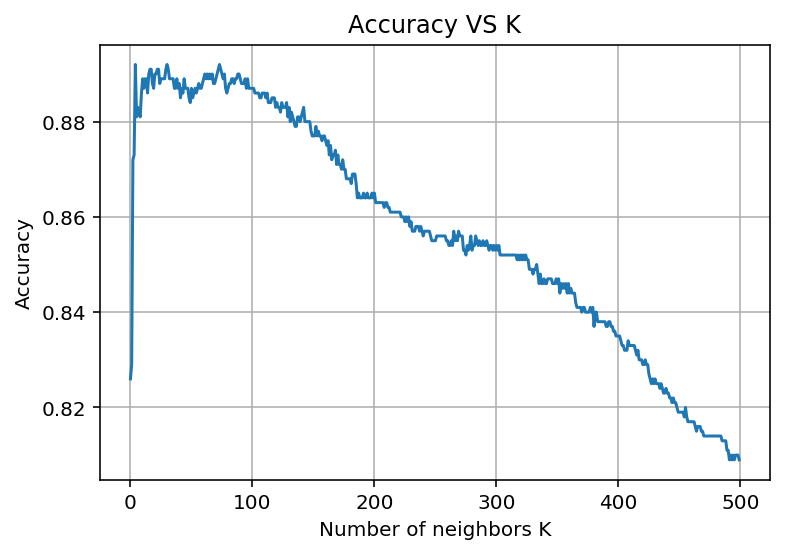

In [12]:
maxK = 500 # Define max number of neighbors
knnAccuracy = np.zeros((maxK,1))
for K in range(1,maxK+1):
    sKnn = KNeighborsClassifier(K) # Default K is 5
    # Fit train set
    sKnn.fit(myTrainData,myTrainLabels)
    # Test on test set
    predictedLabels = sKnn.predict(myTestData)
    # Compute accuracy
    knnAccuracy[K-1] = accuracy(myTestLabels,predictedLabels)

plt.figure()
plt.plot(knnAccuracy)
plt.xlabel("Number of neighbors K")
plt.ylabel("Accuracy")
plt.title("Accuracy VS K")
plt.grid()
plt.show()

**(c)** As expected, the accuracy of classification increases as number of neighbors taken into account increases, up to some point, where it starts decreasing again. This corresponds to the sweep across models with different flexibilities, starting with the most flexible one and ending at the least flexible. 

**(d)** Small K values represent high variance due to the high flexibility of the decision boundary. Large values of K represent high bias setups since the overly inflexible classifier ignores patterns that exist in the data.

**(e)** $K$ values around 50 appear to be the best. The bias-variance trade-off is balanced in this case such that both are minimizes as much as possible.

**(f)** While the number of nearest neighbors $K$ taken into account during classification controls flexibility of the KNN method, in general, the overall number of parameters controls the flexibility (e.g., as in the regression setting where larger number of parameters implies greater flexibility).

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [13]:
x_train = np.array([3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33])
y_train = np.array([46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58])

x_test = np.array([5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35])
y_test = np.array([98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13])

**ANSWER**

**(a)**

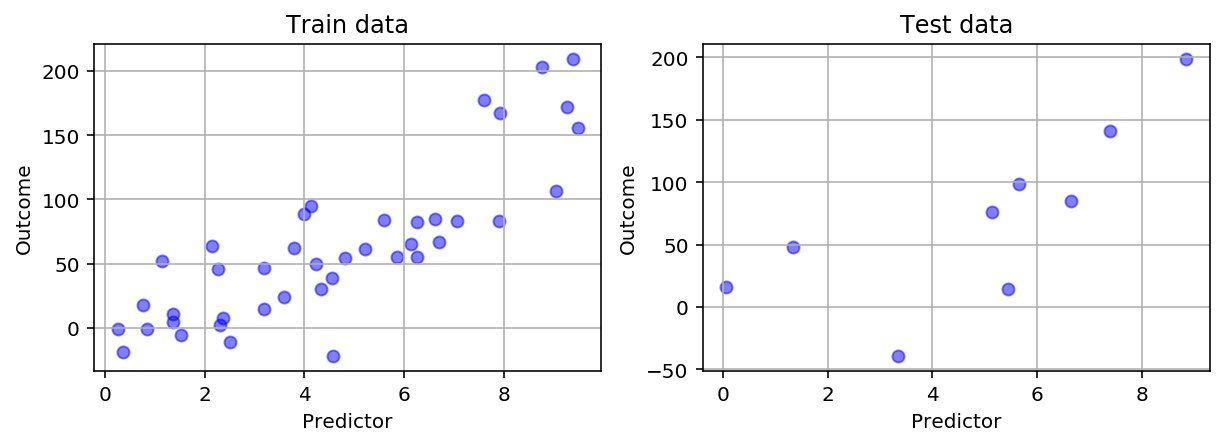

In [14]:
# Plot data
plt.figure(figsize=(10,3))

plt.subplot(1,2,1) # Subplot for training data
plt.scatter(x_train,y_train, color='blue', alpha=.5)
plt.xlabel("Predictor")
plt.ylabel("Outcome")
plt.title("Train data")
plt.grid(True)

plt.subplot(1,2,2) # Subplot for test data
plt.scatter(x_test,y_test, color='blue', alpha=.5)
plt.xlabel("Predictor")
plt.ylabel("Outcome")
plt.title("Test data")
plt.grid(True)

plt.show()

**(b)**

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

myLinReg = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True) # Construct predictor object
myLinReg.fit(x_train.reshape(-1, 1), y_train) # Fit training data

y_hat_train = myLinReg.predict(x_train.reshape(-1, 1)) # Predict based on test data

# Show regression line equation
print('Regression line equation: \n   y = ({})x + ({})'.format(myLinReg.coef_[0], myLinReg.predict(0)[0]))
# Compute and show MSE
print("Mean squared error: {}".format(mean_squared_error(y_train, y_hat_train)))
# Compute and show R^2
print("R^2: {}".format(r2_score(y_train, y_hat_train)))

Regression line equation: 
   y = (18.303206847693165)x + (-21.73078292905422)
Mean squared error: 1052.5853662498014
R^2: 0.7014590913812251


**(c)**

In [16]:
myLinReg2 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True) # Construct predictor object
x_train2 = x_train*x_train # For example, let the second predictor be the square of the first

transformedTrainData = np.array([x_train,x_train2]).T # Put together the two predictor data
myLinReg2.fit(transformedTrainData, y_train) # Fit training data

y_hat_train2 = myLinReg2.predict(transformedTrainData) # Predict based on test data

# Show regression line equation
print('Regression line equation (in transformed space): \n   y = ({})x + ({})x^2 + ({})'.format(myLinReg2.coef_[0],myLinReg2.coef_[1],myLinReg2.predict(np.array([0,0]).reshape(1,2))[0]))
# Compute and show MSE
print("Mean squared error: {}".format(mean_squared_error(y_train, y_hat_train2)))
# Compute and show R^2
print("R^2: {}".format(r2_score(y_train, y_hat_train2)))

Regression line equation (in transformed space): 
   y = (0.47100686043855106)x + (1.8320819097372585)x^2 + (8.00733746158965)
Mean squared error: 884.797759660905
R^2: 0.7490480719353505


**(d)**

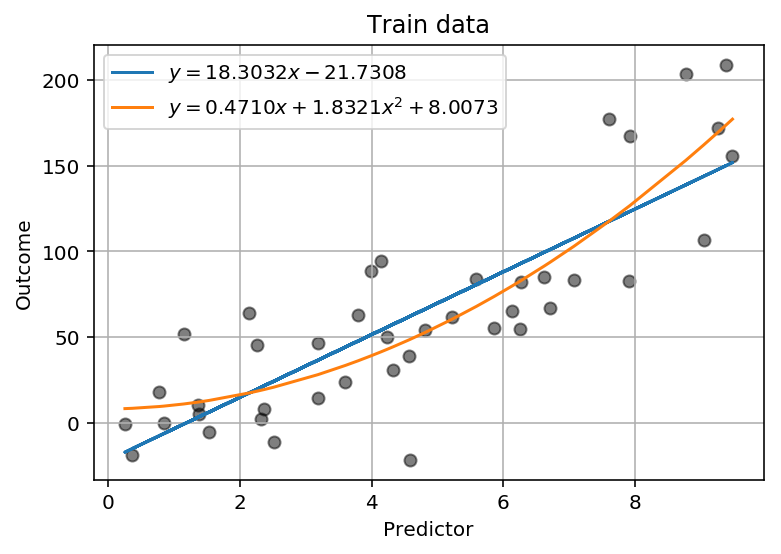

In [17]:
# Plot train data and two predictor curves
plt.figure()
plt.scatter(x_train,y_train,color='black',alpha=0.5) # Scatter plot training data
line1, = plt.plot(x_train,y_hat_train) # Plot first regression line
sortedIndices = np.argsort(y_hat_train2) # Get sorted indices for second regression curve
line2, = plt.plot(x_train[sortedIndices],y_hat_train2[sortedIndices]) # Plot second regression curve
plt.xlabel("Predictor")
plt.ylabel("Outcome")
plt.title("Train data")
plt.legend([line1, line2], ("$y = 18.3032x-21.7308$", "$y = 0.4710x+1.8321x^2+8.0073$"))
plt.grid(True)
plt.show()

**(e)**

Regression line results:

In [18]:
# Test first regression line
y_hat_test = myLinReg.predict(x_test.reshape(-1, 1)) # Predict based on test data
# Compute and show MSE
print("Mean squared error: {}".format(mean_squared_error(y_test, y_hat_test)))
# Compute and show R^2
print("R^2: {}".format(r2_score(y_test, y_hat_test)))

Mean squared error: 2023.3121088887128
R^2: 0.5556465885794163


Regression curve results:

In [19]:
# Test first regression line
x_test2 = x_test*x_test # Transform test data
transformedTestData = np.array([x_test,x_test2]).T # Put together the two predictor data
y_hat_test2 = myLinReg2.predict(transformedTestData) # Predict based on test data
# Compute and show MSE
print("Mean squared error: {}".format(mean_squared_error(y_test, y_hat_test2)))
# Compute and show R^2
print("R^2: {}".format(r2_score(y_test, y_hat_test2)))

Mean squared error: 1398.881758014395
R^2: 0.6927820089560344


**(f)** In both cases, the more flexible model behaves better. It produces lower MSE and higher $R^2$ scores both on training and testing data. The difference is even more significant on testing data.

**(g)** If testing data is significantly different from training data, that implies that there exist patterns in the never-seen data that an algorithm may mispredict if it is not trained on those patterns. In this case, it is interesting that a regression curve fitted to the transformed training data performs just slightly better ($R^2_{train,transform}=0.75$, $R^2_{train,regular}=0.70$), while on the testing data set, the performance benefit becomes larger ($R^2_{test,transform}=0.69$, $R^2_{test,regular}=0.55$). This suggests that perhaps the training data set is not large enough to capture all patterns intrinsic to the system under consideration.